<a href="https://colab.research.google.com/github/shruthireddyrekula/Text_Classification_TF/blob/main/Text_Classification_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Run the following code to ensure colab uses only TensorFlow 2.x:

In [ ]:
try: 
  %tensorflow_version 2.x 
except Exception: 
  pass

Import necessary library including TensorFlow and Keras

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd 
import re 
from matplotlib import pyplot as plt
import nltk
nltk.download('punkt')

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Importing the train tweets

In [ ]:
tweets = pd.read_csv('/content/drive/My Drive/train_tweets.csv')


Seperate the tweet text and the labels using the following code snippet:

In [ ]:
X = tweets.iloc[:, 2].values
y = tweets.iloc[:, 1].values


Text Cleaning and Preprocessing

In [ ]:

def clean_corpus(text):
    corpus = []
    for i in range(len(text)):
        tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s"," ", str(text[i]))
        tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s"," ", tweet)
        tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$"," ", tweet)
        tweet = tweet.lower()
        tweet = re.sub(r"can't","can not", tweet)
        tweet = re.sub(r"hv","have", tweet)
        tweet = re.sub(r"ur","your", tweet)
        tweet = re.sub(r"ain't","is not", tweet)
        tweet = re.sub(r"don't","do not", tweet)
        tweet = re.sub(r"couldn't","could not", tweet)
        tweet = re.sub(r"shouldn't","should not", tweet )
        tweet = re.sub(r"won't","will not", tweet)
        tweet = re.sub(r"there's", "there is", tweet)
        tweet = re.sub(r"it's","it is", tweet)
        tweet = re.sub(r"that's","that is", tweet)
        tweet = re.sub(r"where's","where is", tweet)
        tweet = re.sub(r"who's","who is", tweet)
        tweet = re.sub(r"\W"," ", tweet)
        tweet = re.sub(r"\d"," ", tweet)
        tweet = re.sub(r"[ðâï¼½³ªãºæååçæåä¹µó¾_ëìêè]"," ", tweet)
        tweet =re.sub(r"\s[a-z]\s"," ", tweet)
        tweet = re.sub(r"\s+[a-z]\s+"," ", tweet)
        tweet = re.sub(r"^[a-z]\s"," ", tweet)
        tweet = re.sub(r"^[a-z]\s+"," ", tweet)
        tweet = re.sub(r"\s+"," ", tweet)
        tweet = re.sub(r"^\s","", tweet)
        tweet = re.sub(r"\s$","", tweet)
        corpus.append(tweet)
        
    #return the corpus
    return corpus

        

Tokenizing the text to feed to the model

In [ ]:
#check how many individual words present in the corpus
corpus = clean_corpus(X)
word_dict = {}
for doc in corpus:
    words = nltk.word_tokenize(doc)
    for word in words:
        if word not in word_dict:
            word_dict[word] = 1
        else:
            word_dict[word] += 1
            
print(len(word_dict))


#tokenising the texts
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(corpus)
corpus_tokens = tokenizer.texts_to_sequences(corpus)

Padding text sequences

In [ ]:
#finding the average words present per comment
print(corpus[0])
print(corpus_tokens[0:2])

num_of_words_in_doc =[]
for doc in corpus_tokens:
    num_of_words_in_doc.append(len(doc))
print(num_of_words_in_doc)
print("Average number of words: ", np.average(num_of_words_in_doc))



# Padding the sequences
corpus_pad = keras.preprocessing.sequence.pad_sequences(corpus_tokens,maxlen=25,padding='post')



In [ ]:
# Creating Validation Set

X_train,X_test,y_train,y_test = train_test_split(corpus_pad,y,test_size=0.2,random_state=101)


In [ ]:
# Building & Compiling the model

vocab_size = len(tokenizer.word_index) + 1
max_length = 25
model = keras.Sequential()
model.add(keras.layers.Embedding(input_dim=vocab_size,output_dim=50,input_length=max_length))
model.add(keras.layers.LSTM(units=50,dropout=0.2,recurrent_dropout=0.2))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(model.summary())

In [ ]:

# Train the model
model.fit(X_train,y_train,batch_size=10,epochs=20, verbose=2)

In [ ]:
from keras.utils import pad_sequences
#Loading the test data
test_tweets = pd.read_csv("/content/drive/My Drive/test_tweets_with_hate1.csv")
print(test_tweets.shape)

#cleaning the text
test_data = test_tweets['tweet']
clean_test_data  = clean_corpus(test_data)

#text to sequence and padding
clean_test_data_token = tokenizer.texts_to_sequences(clean_test_data)
clean_test_data_pad = pad_sequences(clean_test_data_token,maxlen=25,padding='post')

In [ ]:
# preparing the submission file    '
final_prediction = (model.predict(clean_test_data_pad) > 0.5).astype("int32")

test_tweets['label'] = final_prediction
test_predictions = test_tweets[['id','label']]
test_predictions.to_csv('LSTM3.csv',index=False)

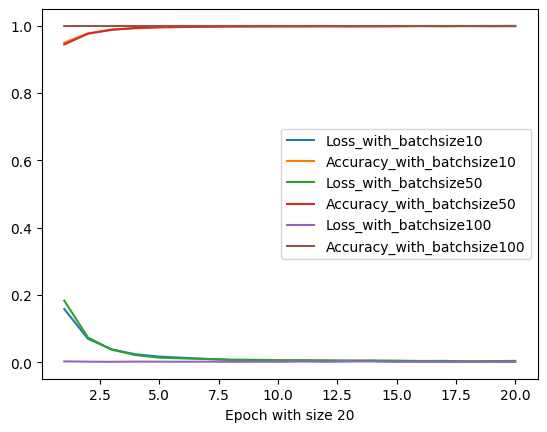

In [ ]:
epoch = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
loss_with_batchsize_10 = [0.1578, 0.0694, 0.0379, 0.0233, 0.0165, 0.0129, 0.0094, 0.0067, 0.006, 0.0039, 0.005, 0.0026, 0.0023, 0.0035, 0.0022, 0.002, 0.0016, 0.0017, 0.0016, 0.00083808]
loss_with_batchsize_50 = [0.1827, 0.0732, 0.037, 0.0211, 0.0133, 0.0112, 0.0095, 0.0072, 0.0069, 0.006, 0.0058, 0.0056, 0.005, 0.0051, 0.0044, 0.0034, 0.0037, 0.0026, 0.003, 0.0037]
loss_with_batchsize_100 = [0.0022, 0.0014, 0.001, 0.0016, 0.0014, 0.0012, 0.0014, 0.00099086, 0.0011, 0.00096764, 0.0018, 0.0013, 0.0031, 0.0019, 0.0012, 0.0011, 0.00078288, 0.00064589, 0.0011, 0.00085402]
accu_with_batchsize_10 = [0.9502, 0.9774,0.9894 ,0.9928,0.9950,0.9962 ,0.9975 , 0.9977 ,0.9983,0.9987, 0.9986, 0.9991,0.9991,0.9988 , 0.9991, 0.9993, 0.9993, 0.9993,0.9995 ,0.9996]
accu_with_batchsize_50 = [0.9447, 0.9767, 0.9881, 0.9935, 0.9961, 0.9969, 0.9972, 0.9982, 0.9981, 0.9982, 0.9984, 0.9985, 0.9986, 0.9985, 0.9987, 0.9992, 0.9987, 0.9992, 0.9989, 0.9989]
accu_with_batchsize_100= [0.9992, 0.9995, 0.9995, 0.9995, 0.9996, 0.9996, 0.9995, 0.9996, 0.9996, 0.9995, 0.9995, 0.9996, 0.9988, 0.9994, 0.9995, 0.9996, 0.9996, 0.9996, 0.9995, 0.9997]
plt.xlabel("Epoch with size 20")
plt.plot(epoch,loss_with_batchsize_10,  label="Loss_with_batchsize10")
plt.plot(epoch,accu_with_batchsize_10,  label="Accuracy_with_batchsize10")
plt.plot(epoch,loss_with_batchsize_50,  label="Loss_with_batchsize50")
plt.plot(epoch,accu_with_batchsize_50,  label="Accuracy_with_batchsize50")
plt.plot(epoch,loss_with_batchsize_100,  label="Loss_with_batchsize100")
plt.plot(epoch,accu_with_batchsize_100,  label="Accuracy_with_batchsize100")
plt.legend()
plt.show()



